# Success Range

On a success chance, the range of values which ensure success.

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

from scripts.probability import roll_success_range

## Example: Roll 1d6 Against a Target

Having

- A six side die
- A target value

We want to know:

- The values which ensure going above or below the target

### Roll Ranges

In [2]:
d = {"value": [1, 2, 3, 4, 5, 6]}
df = pd.DataFrame(data=d)

In [3]:
df["chance_above"] = df.apply(lambda x: roll_success_range(1, 6, x["value"], above=True, equal=False), axis=1)
df["chance_above_equal"] = df.apply(lambda x: roll_success_range(1, 6, x["value"], above=True, equal=True), axis=1)
df["chance_below"] = df.apply(lambda x: roll_success_range(1, 6, x["value"], above=False, equal=False), axis=1)
df["chance_below_equal"] = df.apply(lambda x: roll_success_range(1, 6, x["value"], above=False, equal=True), axis=1)

In [4]:
df

,value,chance_above,chance_above_equal,chance_below,chance_below_equal
0,1,"{'min': 2, 'max': 6}","{'min': 1, 'max': 6}",None,"{'min': 1, 'max': 1}"
1,2,"{'min': 3, 'max': 6}","{'min': 2, 'max': 6}","{'min': 1, 'max': 1}","{'min': 1, 'max': 2}"
2,3,"{'min': 4, 'max': 6}","{'min': 3, 'max': 6}","{'min': 1, 'max': 2}","{'min': 1, 'max': 3}"
3,4,"{'min': 5, 'max': 6}","{'min': 4, 'max': 6}","{'min': 1, 'max': 3}","{'min': 1, 'max': 4}"
4,5,"{'min': 6, 'max': 6}","{'min': 5, 'max': 6}","{'min': 1, 'max': 4}","{'min': 1, 'max': 5}"
5,6,None,"{'min': 6, 'max': 6}","{'min': 1, 'max': 5}","{'min': 1, 'max': 6}"


In [5]:
chance_above = pd.DataFrame(df['chance_above'].apply(pd.Series))
chance_above = chance_above.rename(columns={"min": "min_chance_above", "max": "max_chance_above"})

chance_above_equal = pd.DataFrame(df['chance_above_equal'].apply(pd.Series))
chance_above_equal = chance_above_equal.rename(columns={"min": "min_chance_above_equal", "max": "max_chance_above_equal"})

chance_below = pd.DataFrame(df['chance_below'].apply(pd.Series))
chance_below = chance_below.rename(columns={"min": "min_chance_below", "max": "max_chance_below"})

chance_below_equal = pd.DataFrame(df['chance_below_equal'].apply(pd.Series))
chance_below_equal = chance_below_equal.rename(columns={"min": "min_chance_below_equal", "max": "max_chance_below_equal"})

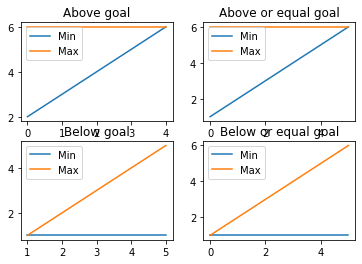

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = chance_above.plot(title="Above goal", ax=axes[0,0])
ax.legend(["Min", "Max"])
ax = chance_above_equal.plot(title="Above or equal goal", ax=axes[0,1])
ax.legend(["Min", "Max"])
ax = chance_below.plot(title="Below goal", ax=axes[1,0])
ax.legend(["Min", "Max"])
ax = chance_below_equal.plot(title="Below or equal goal", ax=axes[1,1])
ax.legend(["Min", "Max"])

## Example: X-Com, Damage Range After Applying Armor

Having:

- A weapon which makes 0 to 40 damage
- Target with armor 0 to 40

We want to know:

- The range of actual damage

In [7]:
values = []
for i in range(0, 41, 1):
    values.append(i)
d = {"value": values}
damage = pd.DataFrame(data=d)

In [8]:
damage["penetrating_damage"] = damage.apply(lambda x: roll_success_range(0, 40, x["value"], normalize=True), axis=1)

In [9]:
damage = pd.DataFrame(damage['penetrating_damage'].apply(pd.Series))

Text(0, 0.5, 'Damage')

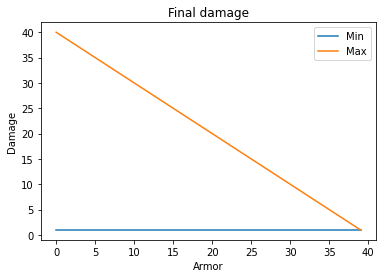

In [10]:
ax = damage.plot(title="Final damage")
ax.legend(["Min", "Max"])
ax.set_xlabel("Armor")
ax.set_ylabel("Damage")